# Data Analyst Professional Practical Exam Submission
## David Ugalde

# **Data Validation**

The original data is **15,000** rows and **8** columns. After validation, there were **13924** rows remaining. The following describes what I did to each column: 


+ week:
    - Dtype: integer; correct because we are counting weeks 
    - Range: (1, 6); correct because there aren’t zero, negative values nor values exceeding 6     - weeks when the new line of office stationery was launched.
    - Null values: 0 
   
+ **sales_method:**
    - Dtype: object; correct because they represent sales methods
    - Null values: 0
    - Unique values: 5 **incorrect** ('Email' 'Email + Call' 'Call' **'em + call' 'email'**)         there should only be 3 (‘Email’, ‘Email + Call’, ‘Call’).
        * **Solution**:
            - <u>Case Standardization:</u> All values were converted to title cases. 
            - <u>Spell Check & Correction:</u> ‘em + call’ was replaced by appropriate “Email + Call’
            - **Effect:** Column cleaned with three standardized sale methods.
            
+ customer_id:
    - Dtype: object; correct because it identifies the customer.
    - Number of duplicates: 0; correct because each value must be a unique identifier for the customer 
    - Null values: 0

+ nb_sold:
    - Dtype: integer; correct because this is a numerical representation of units sold
    - Range: (7, 16); correct because there aren’t zero, negative, or extreme/unrealistic values (e.g. 100k).
    - Null values: 0
    
+ **revenue:**
    - Dtype: float; correct because this is a monetary value so we include cents
    - I also made sure all the values were rounded to 2 decimal places 
    - Range: (32.54, 238.32); correct because there aren’t zero, negative, or extreme/unrealistic numbers (e.g. 1 million).
    - Null values: 1074 
        * **Solution**:
            - I **removed the rows with null values** for revenue leaving **13926** rows left.
        * <u>Reasoning:</u>
            - Null values made up a small portion of the overall data, 7.16% to be exact. Removing these rows does not significantly affect the integrity of our data and it still leaves us with enough data for our analysis.
            - _Why not impute?_ Because imputing by the mean or median affected the distribution of our data (after deliberately checking with boxplots). This can lead to incorrect insights which can be prevented by removing the null values and performing our analysis on the data we actually have. 
            

+ **years_as_customer:**
    - Dtype: integer, correct because we are counting the number of years.
    - Null values: 0
    - Range (0, **63**) **incorrect** our company was founded in 1984 (**no row should have a value greater than 39**). Also, no negative values is correct and 0 values would represent customers who haven’t reached a year so that’s correct too.
    - Subsetting for values greater than 39: **2 found** (47, 63)
    - **Solution:** 
        - I **removed both rows** with values greater than 39 for years_as_customer leaving **13924** rows.
    - _Reasoning:_
        - There are only two rows and it’s highly likely these values are data entry errors (since they’re not possible). Removing them would help maintain data integrity and avoid erroneous analysis due to these being outliers. 
        
+ nb_site_visits:
    - Dtype: integer, correct because we are counting the number of website visits 
    - Range: (12, 37); correct because there aren’t zero, negative, or extreme/unrealistic values. 
    - Null values: 0
    
+ state:
    - Dtype: object, correct because these represent a state 
    - Unique: 50; correct since there are 50 states
    - Standardized? Yes, in addition, manually checked for states to be what we expected them to be. 


In [46]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load product_sales.csv
df = pd.read_csv('product_sales.csv')

In [47]:
# Display first few rows of data
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [48]:
# Number of rows and columns
df.shape

(15000, 8)

In [49]:
# Summary statistics 
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [50]:
# Check for sales methods validity
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


In [51]:
# Standardize sales_method's spelling and capitalization
df['sales_method'].replace('em + call', 'Email + Call', inplace=True)
df['sales_method'] = df['sales_method'].str.title()

In [52]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [53]:
# Get total amount of null values for revenue 
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [54]:
# Drop null values * see reasoning in Data Validation * 
df.dropna(inplace=True)

In [55]:
# Check again for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [56]:
# Validate column data types 
print(df.dtypes)

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


In [57]:
# Check categorical columns + week for any inconsistencies 
print(df['week'].unique())
print(df['sales_method'].unique())
print(df['customer_id'].duplicated().sum())
print(df['state'].unique(), len(df['state'].unique()))

[6 5 3 4 1 2]
['Email + Call' 'Call' 'Email']
0
['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming'] 50


In [58]:
# Get the range of numerical column for negative values or inconsistencies 
print(df['nb_sold'].min(), df['nb_sold'].max())
print(df['revenue'].min(), df['revenue'].max())
print(df['years_as_customer'].min(), df['years_as_customer'].max()) # need to clean
print(df['nb_site_visits'].min(), df['nb_site_visits'].max())

7 16
32.54 238.32
0 63
12 37


In [59]:
# Revenue was specified to be rounded to two decimal places so check with function
def 2_decimals(value):
    return round(value, 2) == value

all_values_rounded = df['revenue'].apply(2_decimals).all()

if all_values_rounded:
    print("All values in the column are rounded to two decimal places.")
else:
    print("Not all values in the column are rounded to two decimal places.")


All values in the column are rounded to two decimal places.


In [60]:
# Get a feel of the sales_method to check if theres enough data for analysis 
df.groupby('sales_method')['revenue'].count()

sales_method
Call            4781
Email           6922
Email + Call    2223
Name: revenue, dtype: int64

In [61]:
# Find year_as_customer spread to find outliers 
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

In [62]:
# Remove any impossible row with more years than company's existance (39 years)
df = df[df['years_as_customer'] <= 39]

In [63]:
# Check for incorrect years again by looking at the range 
print(df['years_as_customer'].min(), df['years_as_customer'].max())

0 39


In [64]:
# Get information on all columns and finalize data validation and cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB


# **Exploratory Analysis**

## How many customers where there for each approach? 
Out of our 13,924 customers: The approach that held the majority of customers was ‘Email’ with 49.7%, followed by ‘Call’ with 34.3%, and closing with ‘Email + Call’ with the least amount of customers at 16.0%. 

In [65]:
# Total number of customers 
sales_method_counts = df.groupby('sales_method')['customer_id'].count()
print(sales_method_counts)

sales_method
Call            4780
Email           6921
Email + Call    2223
Name: customer_id, dtype: int64


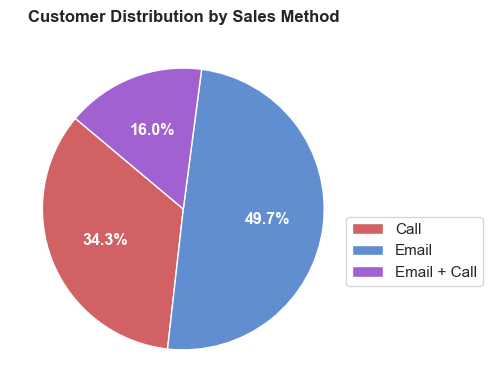

In [66]:
labels = sales_method_counts.index  # Sales method names
sizes = sales_method_counts.values  # Counts or totals

# Set style
sns.set_style('whitegrid')

# Set colors
colors = ['#d16163', '#618dd1', '#a161d1']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'white', 'fontweight': 'bold', 'fontsize': 11.5})
plt.title('Customer Distribution by Sales Method', y=1.08, fontweight='bold')

# Make the pie chart a perfect circle
plt.axis('equal')

# Add a legend
plt.legend(labels,bbox_to_anchor=(1, 0.5),  loc='upper left')

# Display the chart
plt.show()

## What does the spread of the revenue look like overall? And for each method?

### Overall Revenue Spread
Our histogram is **right-skewed** indicating that revenue distribution is mostly concentrated on the left side with **a significant portion being between the 25th percentile (52.47) and the 75th percentile (107.33).** There’s a **significant number of outliers** with values greater than 189.62 and this is also collaborated by our mean 93.94 being greater than our **median 89.50.** As a result, moving forward I have decided to continue our analysis by utilizing the median as our choice for central tendency since it is less affected by the presence of outliers. 

In [67]:
print(df['revenue'].agg(['mean', 'median']))

mean      93.937828
median    89.500000
Name: revenue, dtype: float64


In [68]:
df['revenue'].describe()

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64

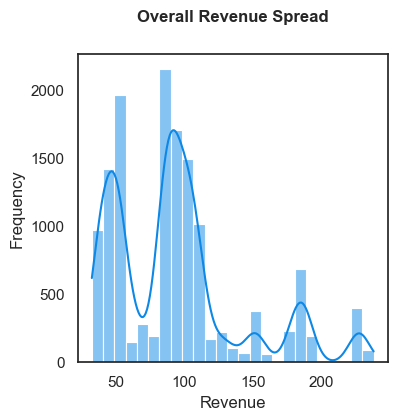

In [69]:
# Set style
sns.set_style('white')

# Histogram for overall spread
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x='revenue', kde=True, color='#0d88e6', bins=25)
plt.title('Overall Revenue Spread', y=1.08, fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### Revenue Spread by Sales Method 
- **The boxplot reveals that the sales method with the highest median revenue is "Email + Call" at 184.74**, featuring the widest spread, with a minimum of 122.11 and a maximum of 238.32.
- "Email" follows with a median revenue of 95.58 and a moderate spread, ranging from a minimum of 78.83 to a maximum of 148.97.
- "Call" has the smallest median revenue at 49.05 and the narrowest spread, spanning from a minimum of 32.74 to a maximum of 71.36.

_Implications for Sales Strategy:_

These findings offer valuable insights for adjusting our sales strategy. Notably, **"Email + Call" yields the highest median revenue, despite having the lowest number of customers (16.00%).** In contrast, "Call" boasts a customer base that is slightly more than double the size of "Email + Call" (34.3%). Furthermore, "Call" requires around 20 extra minutes per customer compared to "Email + Call." These factors provide a foundation for refining our marketing strategies.


In [70]:
df.groupby('sales_method')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4780.0,47.596866,8.610699,32.54,41.470,49.05,52.68,71.36
Email,6921.0,97.127671,11.211279,78.83,87.880,95.58,105.17,148.97
Email + Call,2223.0,183.651233,29.083924,122.11,155.775,184.74,191.11,238.32


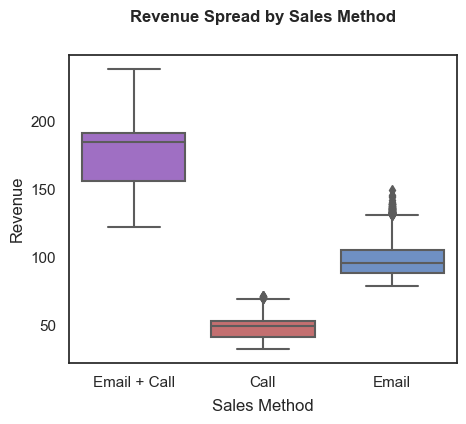

In [71]:
# Set style
sns.set_style('white')


# Define custom colors for each box
custom_palette = {
    'Call': '#d16163',
    'Email': '#618dd1',
    'Email + Call': '#a161d1'
}

# Boxplot for overall spread by sales method
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='sales_method', y='revenue', palette=custom_palette)
plt.title('Revenue Spread by Sales Method', y=1.08, fontweight='bold')
plt.xlabel('Sales Method', labelpad=6.5)
plt.ylabel('Revenue')
plt.show()

## Was there any difference in revenue over time for each of the methods?

We will continue to use the **median** to analyze our revenue over time so that we don’t get values that are affected by outliers. Our visualization was performed with a line chart. 

Our analysis indicated that the **median revenue increases for all three sale methods overall** however, there are some differences worth noting. 

**Breakdown:**

- **“Email + Call”:**  a steady and consistent increase is observed. What stands out is that some of the **increments have a steeper slope indicating a more rapid rate of growth** as opposed to the other methods.
- **“Email”:** the **increase is not steady**, but rather fluctuates indicating that there were weeks where the median increased and weeks where it actually decreased. 
- **“Call”:** a steady and consistent increase is observed. However, there’s a **shallow slope** therefore the increase in the median is a lot less pronounced.

In [72]:
df.groupby('week')['revenue'].agg(['median', 'sum'])

,median,sum
week,,
1,85.260,272810.06
2,96.935,197962.60
3,89.450,183776.55
4,105.455,235628.09
5,105.630,254701.28
6,132.320,163111.74


In [73]:
df.groupby(['week', 'sales_method'])['revenue'].median()

week  sales_method
1     Call             35.195
      Email            86.535
      Email + Call    128.720
2     Call             43.460
      Email            99.250
      Email + Call    154.170
3     Call             41.470
      Email            91.800
      Email + Call    149.930
4     Call             51.270
      Email           108.090
      Email + Call    180.550
5     Call             52.970
      Email           108.020
      Email + Call    187.195
6     Call             65.970
      Email           130.450
      Email + Call    227.405
Name: revenue, dtype: float64

In [74]:
df['week'].value_counts()

1    3497
4    2386
5    2366
2    2322
3    2257
6    1096
Name: week, dtype: int64

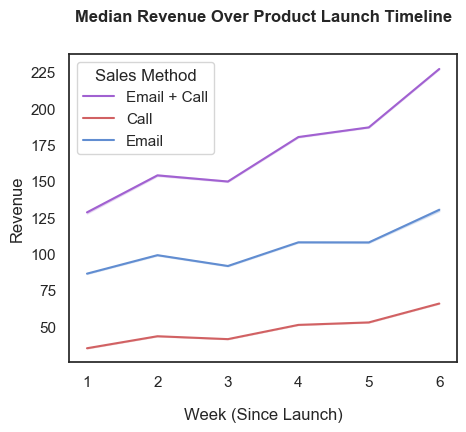

In [75]:

# Define custom colors for each sales method
custom_palette = {
    'Call': '#d16163',
    'Email': '#618dd1',
    'Email + Call': '#a161d1'
}

# Create the line plot with reversed time axis
sns.set()

# Set style
sns.set_style('white')

plt.figure(figsize=(5, 4))
ax = sns.lineplot(data=df, x='week', y='revenue', hue='sales_method', palette=custom_palette, estimator='median')


# Add other labels and title as needed
ax.set_ylabel('Revenue')
ax.set_xlabel('Week (Since Launch)', labelpad=12.5)
ax.set_title('Median Revenue Over Product Launch Timeline', y=1.08, fontweight='bold')

# Add a legend
plt.legend(title='Sales Method')

# Show the plot
plt.show()

## Differences between Customers + Miscellaneous 

### Years as Customer

**Distribution:**
- The boxplot illustrates the distribution of customer tenure with our company. **Most customers have been with the company for fewer than seven years**, as indicated by the median (50th percentile) of 3 years. The 25th percentile is at 1 year, and the 75th percentile is at 7 years. Additionally, it's worth noting that there are several outliers representing customers who have been with the company for more than 16 years.

- _Implication:_  The data suggests that the company should focus on strategies to enhance customer retention. Approximately half of our customers have a tenure of three years or less. To set a target, **we should aim to increase the median tenure to five years.** This would signify improved customer loyalty and potentially higher customer lifetime value.


In [76]:
print(df['years_as_customer'].median())
print(df['years_as_customer'].describe())
print(df['years_as_customer'].value_counts())

3.0
count    13924.000000
mean         4.971775
std          5.011542
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         39.000000
Name: years_as_customer, dtype: float64
1     2336
2     1841
3     1500
0     1348
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
22      38
21      36
24      24
26      19
23      16
25      16
27      14
30       9
33       8
28       8
34       7
31       6
32       5
29       5
35       5
36       4
39       2
38       2
37       2
Name: years_as_customer, dtype: int64


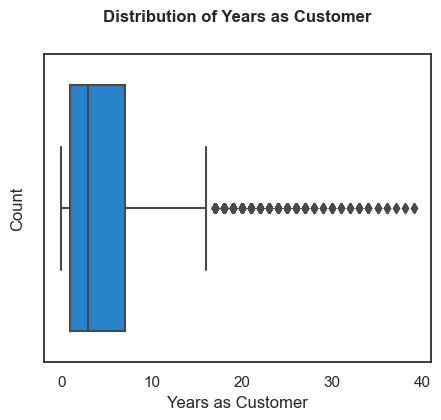

In [77]:
# Set style
sns.set_style('white')

# Histogram for overall spread
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='years_as_customer',color='#0d88e6')
plt.title('Distribution of Years as Customer', y=1.08, fontweight='bold')
plt.xlabel('Years as Customer')
plt.ylabel('Count')
plt.show()
plt.close()

## Differences in Sales_Method Preferance by Customer's 

The stacked bar graph demonstrates the relationship between customer tenure (years as a customer) and their choice of sales method, as measured by total revenue generated. Our customers were categorized into four tenure groups. The last group “15+” essentially represents the outliers of our data being customers with exceptionally long tenure. 

**Breakdown:**

- **The majority of our revenue, 60.8%, is generated by newer customers (0-5 years)**, as customer tenure extends beyond 15 years, the revenue contribution gradually diminishes. 

- For all groups, the sales method that has generated the most money is Email (51.4% of total revenue), followed by Email + Call (31.2% of total revenue), and lastly, Call (17.4% of total revenue).

**Insights:**

- The "Call" method, despite being the most labor-intensive, generates the least revenue. This observation holds even when considering older customers in the "15+" group. Therefore, there's evidence to suggest that transitioning away from the "Call" method should not necessarily raise concerns about alienating long-term customers.

- Additionally, the "Email + Call" method, though used only 16% of the time, consistently ranks as the second most lucrative method. This is particularly impressive given that the "Email" method is used 49.7% of the time.


In [78]:
# Define the custom bins for 'Years as Customer'
## As noted above everyting greater than 15 should be one bar because it's too small
bins = [0, 5, 10, 15, float('inf')]

# Create a new column 'years_bin' to store the bin labels
df['years_bin'] = pd.cut(df['years_as_customer'], bins, right=False)

# Check values to see if they would work in bar chart
print(df['years_bin'].value_counts())

[0.0, 5.0)      8257
[5.0, 10.0)     3590
[10.0, 15.0)    1331
[15.0, inf)      746
Name: years_bin, dtype: int64


In [79]:
# Subset values for stacked bar chart through a pivot table
data = df.pivot_table(index='years_bin', columns='sales_method', values='revenue', aggfunc='sum')
# Set new names for graph
data.index = ['0-5', '5-10', '10-15', '15+']
print(data)

sales_method       Call      Email  Email + Call
0-5           132981.35  400679.77     261548.04
5-10           59222.80  174347.31      94412.06
10-15          22915.83   62342.84      33620.56
15+            12393.04   34850.69      18676.03


In [80]:
# Subset values for stacked bar chart through a pivot table
data_temp = df.pivot_table(index='years_bin', columns='sales_method', values='revenue', aggfunc='median', margins=True)
# Set new names for graph
data_temp.index = ['0-5', '5-10', '10-15', '15+', '..']
print(data_temp)

sales_method   Call   Email  Email + Call     All
0-5           50.23  96.325       185.240  90.810
5-10          44.91  94.615       184.250  88.590
10-15         44.53  93.635       182.525  87.090
15+           43.40  92.950       179.900  86.505
..            49.05  95.580       184.740  89.500


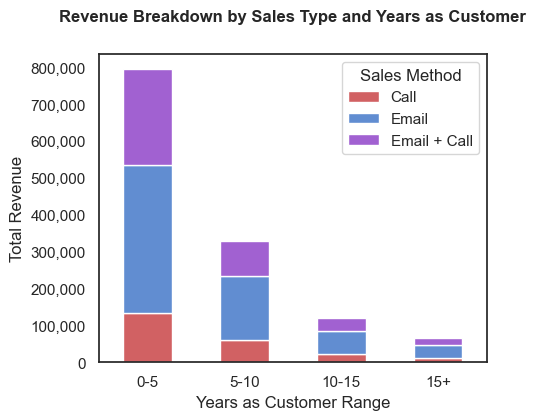

In [81]:
# Library to allow easy formating of y ticks 
import matplotlib.ticker as mtick

sns.set_style('white')
# Prevent extra output by Jupyter Notebook 
plt.rcParams["figure.figsize"] = (5,4)
data.plot(kind='bar', stacked=True, color=custom_palette)

plt.title('Revenue Breakdown by Sales Type and Years as Customer', y=1.08, fontweight='bold')
plt.xlabel('Years as Customer Range')
plt.ylabel('Total Revenue')
plt.xticks(rotation= 0)

# Format y-axis ticks with commas
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Sales Method')

plt.show()


### Sales Method Analysis 
Created three bar graphs to visualize the differences between the sales method and the median number of products sold, median number of site visits, and for comparative purposes median revenue earned (once more).

Three bar graphs were created to compare the performance of the different sales methods. The key metrics are the median number of site visits, the median number of products sold, and for reference, the median revenue generated. 

**Breakdown:**

- **The data clearly shows that the 'Email + Call' sales method consistently outperforms both the 'Email' and 'Call' methods across the board.** Notably, the differences in the number of products sold and site visits, while positive, are less pronounced compared to the substantial disparity in revenue.


- The median number of products sold for both 'Email' and 'Call' methods is identical at 10. Similarly, the median number of site visits for 'Email' (25) and 'Call' (24) closely mirrors each other. This suggests that, in these aspects, 'Email' and 'Call' perform quite similarly.

**Insights:**


- The 'Email + Call' method excels in driving traffic to the site and increasing the number of products sold. Its high median revenue further reinforces its effectiveness. **This combination of strong performance in multiple areas makes it a compelling sales strategy.**

- Despite the relatively similar performance of 'Call' and 'Email' in product sales and site visits, it's important to consider the labor intensity of the 'Call' method. It requires more effort for results similar to 'Email.' Additionally, 'Email' boasts a higher median revenue compared to 'Call,' with a difference of 46.53.


In [84]:
data2 = df.groupby('sales_method')['nb_site_visits'].median()
print(data2)

sales_method
Call            24.0
Email           25.0
Email + Call    27.0
Name: nb_site_visits, dtype: float64


In [85]:
data3 = df.groupby('sales_method')['nb_sold'].median()
print(data3)

sales_method
Call            10.0
Email           10.0
Email + Call    12.0
Name: nb_sold, dtype: float64


In [86]:
data4 = df.groupby('sales_method')['revenue'].median()
print(data4)

sales_method
Call             49.05
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64


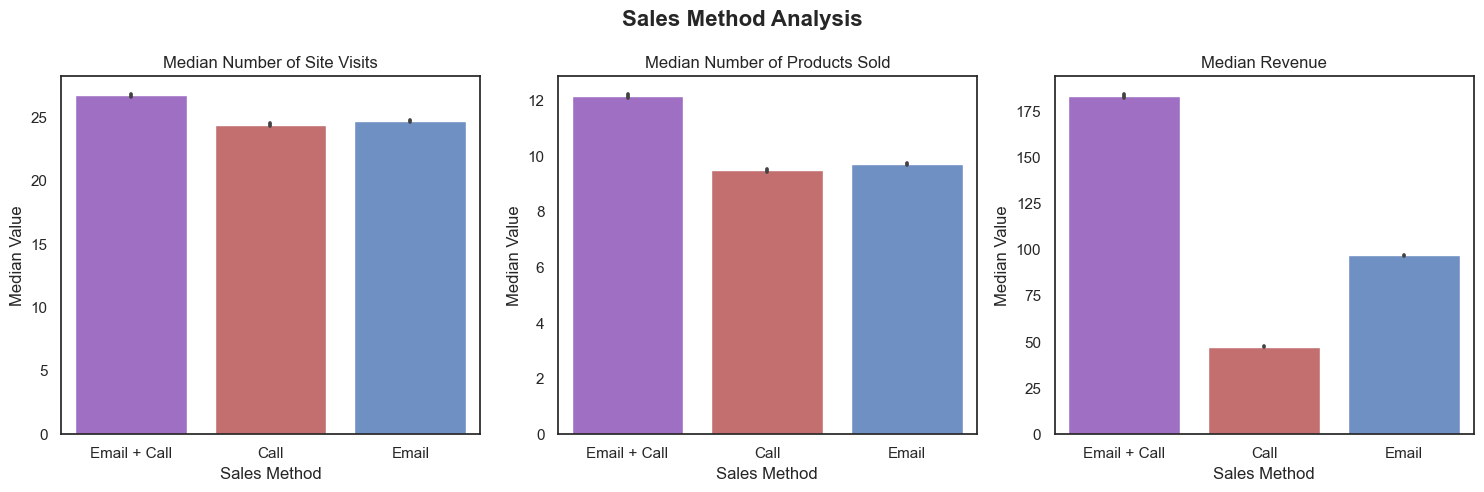

In [87]:
# Create subplots using a loop
metrics = ['nb_site_visits', 'nb_sold', 'revenue']
titles = ['Median Number of Site Visits', 'Median Number of Products Sold', 'Median Revenue']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(metrics):
    sns.barplot(data=df, x='sales_method', y=metric, ax=axes[i], palette=custom_palette)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Sales Method')
    axes[i].set_ylabel('Median Value')

# Add a title for all three graphs
fig.suptitle('Sales Method Analysis', fontsize=16, fontweight='bold')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Geographic Breakdown
A choropleth map was created to visually represent the revenue distribution across the United States. 

**Top 5 States (Total Revenue):**
1. California (14.65%)
2. Texas (9.69%)
3. New York (7.59%)
4. Florida (7.05%)
5. Illinois (4.78%)

The map highlights the top revenue-generating states, which constitute a significant portion of the total revenue (43.76%). Focusing marketing efforts on these states can help sustain and potentially boost the revenue stream.
Creating performance benchmarks for states or areas that may be underperforming. Identifying low-performing regions, such as the Midwest, presents an opportunity to strategize and implement targeted campaigns to increase revenue in these areas.


In [88]:
df.groupby('state')['revenue'].sum().sort_values(ascending=False)

state
California        160893.20
Texas             106294.45
New York           83242.74
Florida            77651.75
Illinois           52649.35
Pennsylvania       51595.35
Ohio               48010.94
Michigan           44424.81
Georgia            43426.41
North Carolina     38418.15
New Jersey         36527.03
Virginia           33749.37
Indiana            30624.27
Washington         30398.39
Tennessee          27694.97
Arizona            27201.18
Missouri           25859.42
Massachusetts      25225.59
Maryland           22789.32
Wisconsin          21989.49
Minnesota          21352.64
South Carolina     21344.17
Oregon             21072.33
Louisiana          20214.17
Alabama            19583.86
Colorado           19545.48
Kentucky           18961.13
Oklahoma           17701.65
Connecticut        16352.65
Iowa               13978.13
Mississippi        13349.49
Kansas             11941.95
Utah               11440.50
Arkansas           10795.38
Nevada              9587.55
Nebraska      

In [89]:
# Dictionay with state abbreviations, so that plotly works.
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

# Create a new column 'state_abbrev' 
df['state_abbrev'] = df['state'].map(state_abbreviations)

In [90]:
import plotly.express as px

map_data = df.pivot_table(index='state_abbrev', values='revenue', aggfunc='sum')


fig = px.choropleth(
    map_data,
    locations=map_data.index,  
    locationmode="USA-states",
    color="revenue",  
    scope="usa",  # Set the map's scope 
    color_continuous_scale="Greens", 
    title="Total Revenue by State",
)

fig.show()

## Definitions of a metric for the business to monitor

Sales Revenue but more specifically **median revenue per customer metric** is the metric that the sales team at Pens and Printers should use to monitor their business. This metric will enable us to choose our marketing strategy by narrowing in on what metric is generating the most revenue despite which metric was used the most and despite outliers in our data. 

We can analyze how median revenue per customer does for each sales method and this will empower the sales team to decide on what sales method is the most efficient at consistently generating the most revenue. In addition, we can analyze the median revenue growth each sales method has over time by identifying how well the median revenue is over the product launch timeline. Lastly, we can identify the median revenue per customer across different ranges of years as a customer to identify what group to target for our marketing strategy.

**Initial Values for Median Revenue**

**_Overall:_** 89.5

_Sales Method:_
- **Email + Call:** 184.74
- **Email:** 95.58
- **Call:** 49.05

_Years as Customer (Ranges):_

- **0 - 5:** 90.81  
- **5 - 10:** 88.59 
- **10 - 15:** 87.09 
- **15+:** 86.50: 


## Summary & Recommendations:

**The sales team should employ the Email + Call sales method for their sales strategy.** Email + Call has a significantly higher median revenue than the other two methods which means money is being lost since it’s the least used method out of the three. In addition, Email + Call has shown consistent and steady growth over the weeks since the product launch timeline. Email + Call also had the highest median number of site visits and the highest median number of products sold. 

**The sales team should drop the Call sales method altogether preferably in favor of Email + Call**, but solely Email is better too. Not only does it have the lowest median revenue out of the three sales methods, but the Call method doesn’t excel in any area. It performs on par with Email for the median number of site visits and median number of products sold. This isn’t good when taking into account that the “Email” method takes no work from our team, whereas the “Call” method takes 30 minutes per customer.  Its performance over time increases at such a shallow rate its insignificant. Finally, the Call method makes up the least amount of revenue for all our years as customer ranges, which is evidence that retiring the Call method will not affect our long-term customer relationship significantly. 

**Prioritizing customers who have been with the company for under 5 years** will allow us to increase our revenue. This group of customers has the highest median of the years as customer ranges and makes up the majority of revenue and customers. However, for the long-term success of our company a new benchmark should be established to increase the median number of years as customers from three years to five years. 


**Prioritizing our high-performing states:** California, Texas, New York, Florida, and Illinois will allow us to increase our revenue. These five states make up the majority of our revenue and spending our efforts on these states will be worthwhile. However, in some states, our revenue is currently minimal (less than 1% of total revenue), indicating an untapped potential for growth. By not actively expanding our market presence in these regions, we may be missing out on significant revenue opportunities.